In [1]:
import pandas as pd

# Load the CSV file into a DataFrame
file_path = '/Users/xinyue/Desktop/Project 2/Mornington.csv'
df = pd.read_csv(file_path)
print(df)

             Unnamed: 0                     Unnamed: 1 Mar 2010 Unnamed: 83  \
0  Mornington Peninsula                Dromana-Portsea    1,658     $260.00   
1                   NaN                      Frankston    2,704     $265.00   
2                   NaN              Hastings-Flinders      958     $270.00   
3                   NaN  Mt Eliza-Mornington-Mt Martha    1,371     $330.00   
4                   NaN           Seaford-Carrum Downs    1,514     $280.00   
5                   NaN                    Group Total    8,205     $275.00   

  Jun 2010 Unnamed: 85 Sep 2010 Unnamed: 87 Dec 2010 Unnamed: 89  ...  \
0    1,661     $265.00    1,653     $270.00    1,624     $280.00  ...   
1    2,746     $270.00    2,760     $280.00    2,762     $281.00  ...   
2      961     $275.00      976     $280.00      959     $280.00  ...   
3    1,366     $340.00    1,316     $350.00    1,307     $350.00  ...   
4    1,500     $285.00    1,510     $290.00    1,509     $295.00  ...   
5    8,2

In [2]:
# Create a new header row with 'Count' and 'Median' labels starting from the third column
new_header = ['Area', 'Suburb']  # Start with 'Area' and 'Suburb' for the first two columns

# Use a loop to dynamically generate 'Count.1', 'Median.1', 'Count.2', 'Median.2', etc.
count_num = 1  # Initialize count number
median_num = 1  # Initialize median number

# Start from the third column
for i in range(2, len(df.columns)):
    if (i - 2) % 4 == 0:  # Every 4th column should be 'Count'
        new_header.append(f'Count.{count_num}')
        count_num += 1
    elif (i - 2) % 4 == 1:  # Every 2nd column after 'Count' should be 'Median'
        new_header.append(f'Median.{median_num}')
        median_num += 1
    elif (i - 2) % 4 == 2:  # Every 2nd column should be 'Count'
        new_header.append(f'Count.{count_num}')
        count_num += 1
    else:  # Remaining columns are 'Median'
        new_header.append(f'Median.{median_num}')
        median_num += 1

# Assign the new header row to the DataFrame columns
df.columns = new_header

In [3]:
# Filter out the columns that contain 'Median' in their name to get the median rental prices
median_columns = [col for col in df.columns if 'Median' in col]

# Extract only the 'Median' columns along with the 'Suburb' column
median_data = df[['Suburb'] + median_columns].copy()

print(median_data)

                          Suburb Median.1 Median.2 Median.3 Median.4 Median.5  \
0                Dromana-Portsea  $260.00  $265.00  $270.00  $280.00  $280.00   
1                      Frankston  $265.00  $270.00  $280.00  $281.00  $290.00   
2              Hastings-Flinders  $270.00  $275.00  $280.00  $280.00  $290.00   
3  Mt Eliza-Mornington-Mt Martha  $330.00  $340.00  $350.00  $350.00  $360.00   
4           Seaford-Carrum Downs  $280.00  $285.00  $290.00  $295.00  $300.00   
5                    Group Total  $275.00  $280.00  $290.00  $295.00  $300.00   

  Median.6 Median.7 Median.8 Median.9  ... Median.32 Median.33 Median.34  \
0  $290.00  $290.00  $290.00  $290.00  ...   $370.00   $370.00   $375.00   
1  $290.00  $295.00  $295.00  $295.00  ...   $350.00   $350.00   $355.00   
2  $300.00  $300.00  $300.00  $300.00  ...   $360.00   $370.00   $370.00   
3  $360.00  $370.00  $370.00  $370.00  ...   $450.00   $450.00   $460.00   
4  $300.00  $310.00  $310.00  $310.00  ...   $360.00

In [4]:
# Convert each median rental price column to numeric, removing non-numeric characters
for col in median_data.columns:
    if 'Median' in col:
        # Remove any dollar signs or non-numeric characters and convert to numeric
        median_data[col] = pd.to_numeric(median_data[col].astype(str).str.replace('[\$,]', '', regex=True), errors='coerce')
print(median_data)

                          Suburb  Median.1  Median.2  Median.3  Median.4  \
0                Dromana-Portsea     260.0     265.0     270.0     280.0   
1                      Frankston     265.0     270.0     280.0     281.0   
2              Hastings-Flinders     270.0     275.0     280.0     280.0   
3  Mt Eliza-Mornington-Mt Martha     330.0     340.0     350.0     350.0   
4           Seaford-Carrum Downs     280.0     285.0     290.0     295.0   
5                    Group Total     275.0     280.0     290.0     295.0   

   Median.5  Median.6  Median.7  Median.8  Median.9  ...  Median.32  \
0     280.0     290.0     290.0     290.0     290.0  ...      370.0   
1     290.0     290.0     295.0     295.0     295.0  ...      350.0   
2     290.0     300.0     300.0     300.0     300.0  ...      360.0   
3     360.0     360.0     370.0     370.0     370.0  ...      450.0   
4     300.0     300.0     310.0     310.0     310.0  ...      360.0   
5     300.0     300.0     300.0     305.0

<>:5: SyntaxWarning: invalid escape sequence '\$'
<>:5: SyntaxWarning: invalid escape sequence '\$'
/var/folders/_s/4j24gf8n0ls5dt1yjm000kbr0000gn/T/ipykernel_58128/4014745995.py:5: SyntaxWarning: invalid escape sequence '\$'
  median_data[col] = pd.to_numeric(median_data[col].astype(str).str.replace('[\$,]', '', regex=True), errors='coerce')


In [5]:
# Round the 'Median' columns to the nearest integer and convert to integer type
for col in median_columns:
    median_data[col] = median_data[col].round().astype('Int64')  # Use 'Int64' to allow for NaN values

# Print the converted data to ensure that all columns have been properly converted
print("Median Data after conversion to integers:")
print(median_data.head())

Median Data after conversion to integers:
                          Suburb  Median.1  Median.2  Median.3  Median.4  \
0                Dromana-Portsea       260       265       270       280   
1                      Frankston       265       270       280       281   
2              Hastings-Flinders       270       275       280       280   
3  Mt Eliza-Mornington-Mt Martha       330       340       350       350   
4           Seaford-Carrum Downs       280       285       290       295   

   Median.5  Median.6  Median.7  Median.8  Median.9  ...  Median.32  \
0       280       290       290       290       290  ...        370   
1       290       290       295       295       295  ...        350   
2       290       300       300       300       300  ...        360   
3       360       360       370       370       370  ...        450   
4       300       300       310       310       310  ...        360   

   Median.33  Median.34  Median.35  Median.36  Median.37  Median.38  \
0  

Growth trend for Dromana-Portsea:
   Median.1  Median.2  Median.3  Median.4  Median.5  Median.6  Median.7  \
0      <NA>  1.923077  1.886792  3.703704       0.0  3.571429       0.0   

   Median.8  Median.9  Median.10  ...  Median.33  Median.34  Median.35  \
0       0.0       0.0        0.0  ...        0.0   1.351351        0.0   

   Median.36  Median.37  Median.38  Median.39  Median.40  Median.41  \
0   1.333333        0.0        0.0   1.315789        0.0  35.064935   

   Average Growth Rate (%)  
0                 1.870899  

[1 rows x 42 columns]


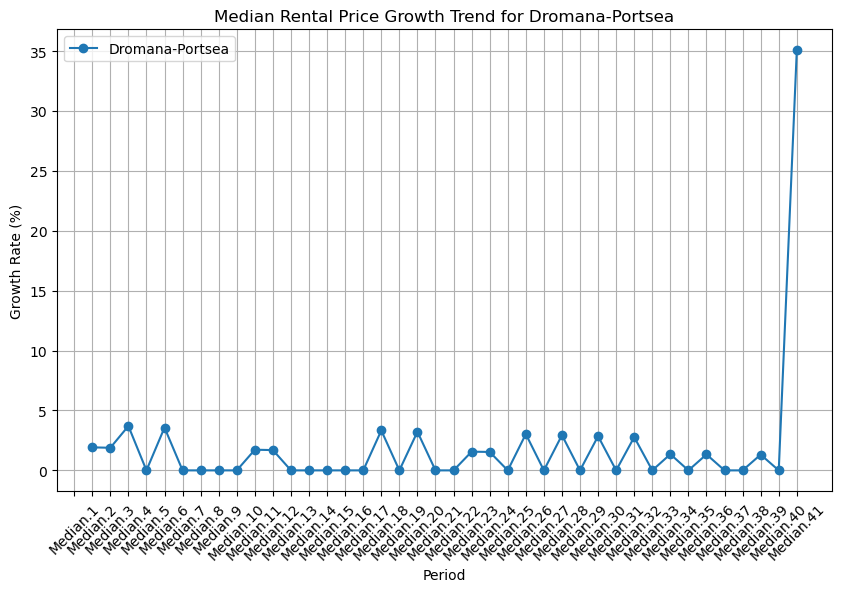

Growth trend for Frankston:
   Median.1  Median.2  Median.3  Median.4  Median.5  Median.6  Median.7  \
1      <NA>  1.886792  3.703704  0.357143  3.202847       0.0  1.724138   

   Median.8  Median.9  Median.10  ...  Median.33  Median.34  Median.35  \
1       0.0       0.0        0.0  ...        0.0   1.428571   1.408451   

   Median.36  Median.37  Median.38  Median.39  Median.40  Median.41  \
1        0.0        0.0        0.0        0.0   1.388889  23.287671   

   Average Growth Rate (%)  
1                 1.391281  

[1 rows x 42 columns]


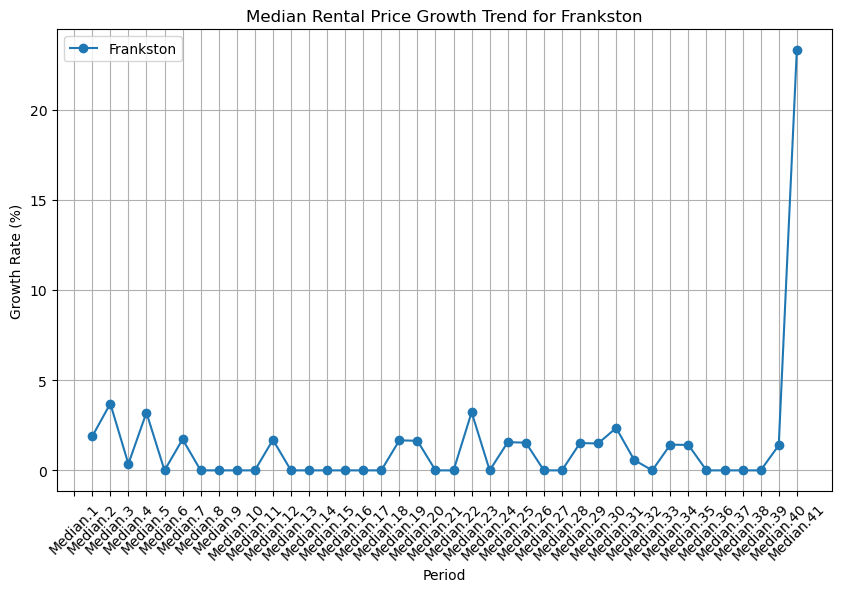

Growth trend for Hastings-Flinders:
   Median.1  Median.2  Median.3  Median.4  Median.5  Median.6  Median.7  \
2      <NA>  1.851852  1.818182       0.0  3.571429  3.448276       0.0   

   Median.8  Median.9  Median.10  ...  Median.33  Median.34  Median.35  \
2       0.0       0.0        0.0  ...   2.777778        0.0   1.351351   

   Median.36  Median.37  Median.38  Median.39  Median.40  Median.41  \
2        0.0   1.333333   1.315789   1.298701   1.282051  26.582278   

   Average Growth Rate (%)  
2                 1.627203  

[1 rows x 42 columns]


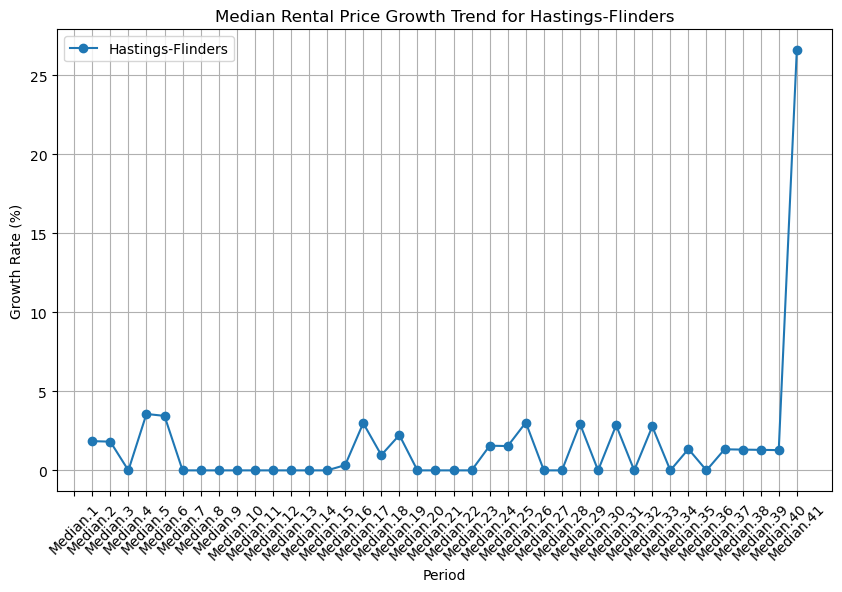

Growth trend for Mt Eliza-Mornington-Mt Martha:
   Median.1  Median.2  Median.3  Median.4  Median.5  Median.6  Median.7  \
3      <NA>  3.030303  2.941176       0.0  2.857143       0.0  2.777778   

   Median.8  Median.9  Median.10  ...  Median.33  Median.34  Median.35  \
3       0.0       0.0        0.0  ...        0.0   2.222222        0.0   

   Median.36  Median.37  Median.38  Median.39  Median.40  Median.41  \
3   4.347826        0.0   2.083333        0.0  -2.040816       25.0   

   Average Growth Rate (%)  
3                 1.575761  

[1 rows x 42 columns]


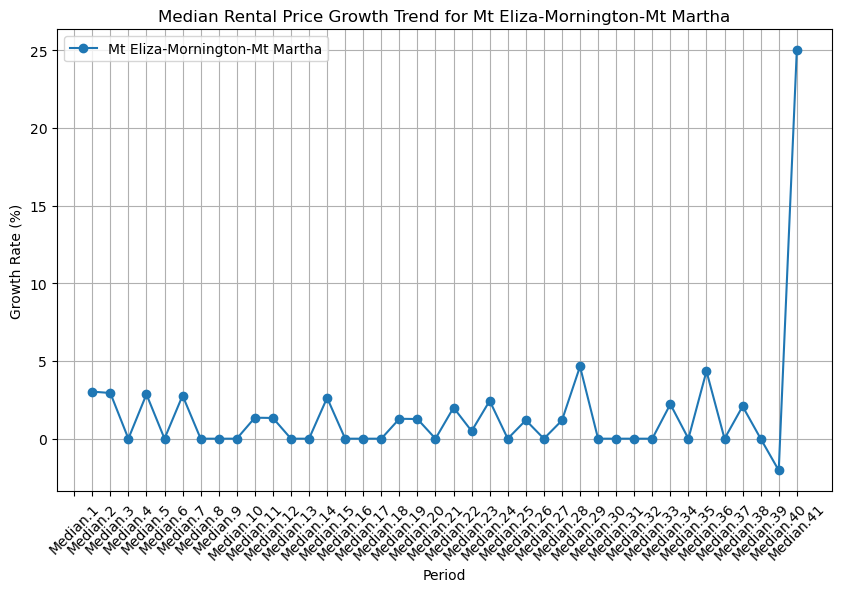

Growth trend for Seaford-Carrum Downs:
   Median.1  Median.2  Median.3  Median.4  Median.5  Median.6  Median.7  \
4      <NA>  1.785714  1.754386  1.724138  1.694915       0.0  3.333333   

   Median.8  Median.9  Median.10  ...  Median.33  Median.34  Median.35  \
4       0.0       0.0        0.0  ...        0.0   1.388889   1.369863   

   Median.36  Median.37  Median.38  Median.39  Median.40  Median.41  \
4        0.0        0.0        0.0        0.0        0.0  21.621622   

   Average Growth Rate (%)  
4                  1.24403  

[1 rows x 42 columns]


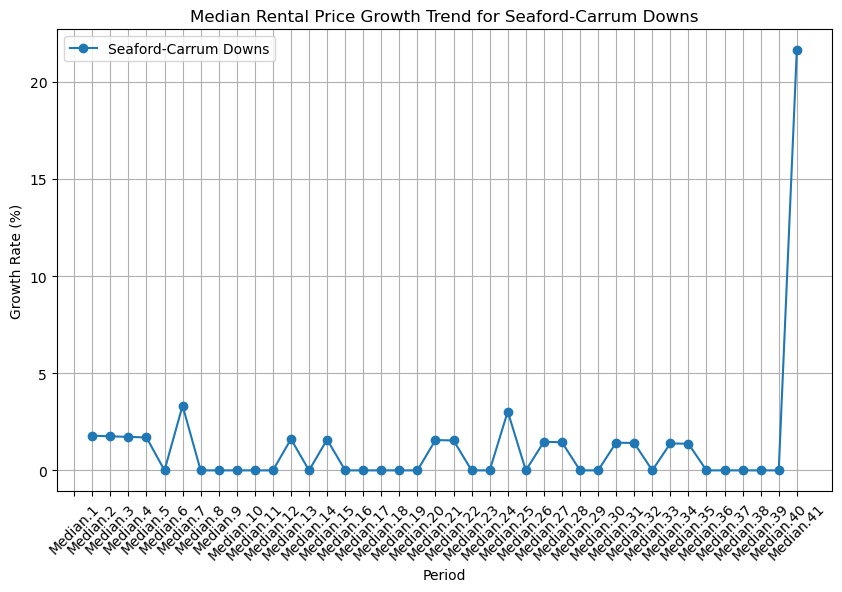

Growth trend for Group Total:
   Median.1  Median.2  Median.3  Median.4  Median.5  Median.6  Median.7  \
5      <NA>  1.818182  3.571429  1.724138  1.694915       0.0       0.0   

   Median.8  Median.9  Median.10  ...  Median.33  Median.34  Median.35  \
5  1.666667  1.639344        0.0  ...        0.0   1.351351   1.333333   

   Median.36  Median.37  Median.38  Median.39  Median.40  Median.41  \
5        0.0        0.0        0.0   1.315789        0.0  25.974026   

   Average Growth Rate (%)  
5                  1.49882  

[1 rows x 42 columns]


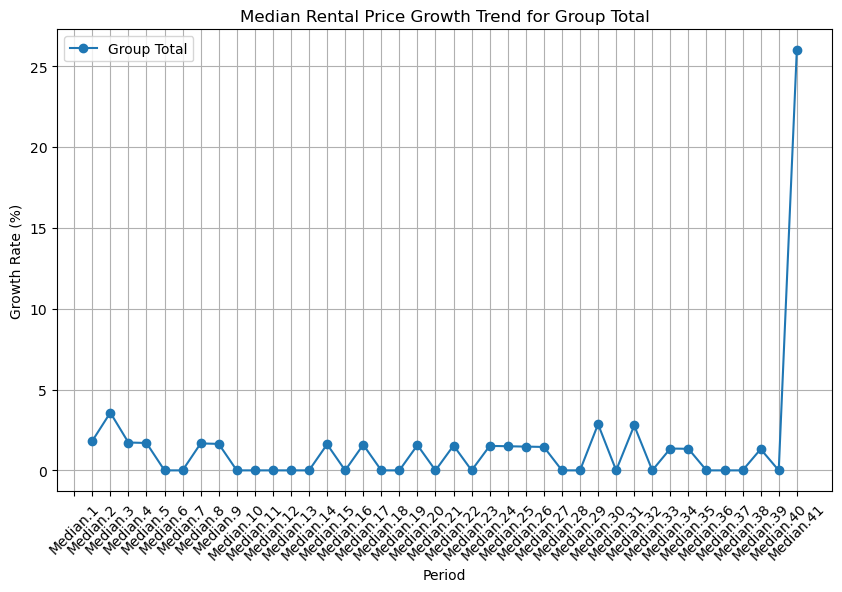

All suburbs growth trends:
   Median.1  Median.2  Median.3  Median.4  Median.5  Median.6  Median.7  \
0      <NA>  1.923077  1.886792  3.703704       0.0  3.571429       0.0   
1      <NA>  1.886792  3.703704  0.357143  3.202847       0.0  1.724138   
2      <NA>  1.851852  1.818182       0.0  3.571429  3.448276       0.0   
3      <NA>  3.030303  2.941176       0.0  2.857143       0.0  2.777778   
4      <NA>  1.785714  1.754386  1.724138  1.694915       0.0  3.333333   
5      <NA>  1.818182  3.571429  1.724138  1.694915       0.0       0.0   

   Median.8  Median.9  Median.10  ...  Median.33  Median.34  Median.35  \
0       0.0       0.0        0.0  ...        0.0   1.351351        0.0   
1       0.0       0.0        0.0  ...        0.0   1.428571   1.408451   
2       0.0       0.0        0.0  ...   2.777778        0.0   1.351351   
3       0.0       0.0        0.0  ...        0.0   2.222222        0.0   
4       0.0       0.0        0.0  ...        0.0   1.388889   1.369863   
5  

In [6]:
import matplotlib.pyplot as plt
# Calculate the growth rate for each suburb separately and plot them
growth_trends = pd.DataFrame()

for suburb in median_data['Suburb'].unique():
    # Filter the data for the specific suburb
    suburb_data = median_data[median_data['Suburb'] == suburb].copy()

    # Calculate the percentage change in the median rental prices across the periods
    suburb_data_growth = suburb_data[median_columns].pct_change(axis='columns') * 100

    # Calculate cumulative growth or average growth as needed (here, taking the mean growth rate)
    suburb_data_growth['Average Growth Rate (%)'] = suburb_data_growth.mean(axis=1)

    # Append the results to the main DataFrame
    growth_trends = pd.concat([growth_trends, suburb_data_growth], ignore_index=True)

    # Print the growth trend for the suburb
    print(f"Growth trend for {suburb}:")
    print(suburb_data_growth)

    # Plotting the growth trend for the current suburb
    plt.figure(figsize=(10, 6))
    plt.plot(suburb_data_growth.columns[:-1], suburb_data_growth.iloc[0, :-1], marker='o', linestyle='-', label=suburb)
    plt.title(f'Median Rental Price Growth Trend for {suburb}')
    plt.xlabel('Period')
    plt.ylabel('Growth Rate (%)')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.legend()
    plt.show()

# Optional: Print all the growth trends for all suburbs
print("All suburbs growth trends:")
print(growth_trends)

In [7]:
print(growth_trends["Average Growth Rate (%)"])

0    1.870899
1    1.391281
2    1.627203
3    1.575761
4     1.24403
5     1.49882
Name: Average Growth Rate (%), dtype: Float64
